In [ ]:
from nicosload import read_pad_file
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
from datafile import Datafile
dat1 = Datafile('kappa')
%matplotlib inline
dtx_vals =[k + 470 for k in [120,140,160,180]+[800]]
sth_vals = np.linspace(-0.4,-1.4,51).tolist() + np.linspace(-1.45,-1.8,8).tolist()
dtxlen = len(dtx_vals)
sthlen = len(sth_vals)
print(dtxlen,sthlen)
all_areas = np.zeros((dtxlen,sthlen))
all_centers = np.zeros((dtxlen,sthlen))
all_amplitudes = np.zeros((dtxlen,sthlen))
all_amplitudesErr = np.zeros((dtxlen,sthlen))
all_sigmas = np.zeros((dtxlen,sthlen))
for file in range(6543,7132,2):
    dtx_ind,sth_ind = divmod((file-6543)//2,59)
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    #dat1 = Datafile('asdf')
    #dat1.fig,dat1.ax = plt.subplots(1,1)

    dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    if file > 6852 and file < 6854:
        dat1.fig1,dat1.ax1 = plt.subplots(1,1) 
        bar = dat1.ax1.imshow(data[40:88,50:95],norm = LogNorm())
        dat1.ax1.set_xlabel('x (arb. u. m)')
        dat1.ax1.set_ylabel('y (arb. u. m)')
        dat1.ax1.set_xticks([])
        dat1.ax1.set_yticks([])
        plt.tight_layout()
        plt.colorbar(bar)
        dat1.ax.set_ylabel('Integrated counts')
        dat1.ax.set_xlabel('x (arb. u. m)')
        dat1.ax.set_xlim(50,95)
        #dat1.ax.get_legend().remove()
        #dat1.fig1.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Hercules/Poster/posterpictures/MIRAmeasure.png',bbox_inches = 'tight',dpi = 600)
        #dat1.fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Hercules/Poster/posterpictures/MIRAint.png',bbox_inches = 'tight',dpi = 600)
    else:
        pass
        #res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
        #           plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = [res.params['g0_center'].stderr,res.params['g1_center'].stderr]
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    
    all_sigmas[dtx_ind,sth_ind] = sigmas[i]
    all_amplitudes[dtx_ind,sth_ind] = amplitudes[i]
    all_amplitudesErr[dtx_ind,sth_ind]= ampErr[i]
    all_areas[dtx_ind,sth_ind] = areas[i]
    all_centers[dtx_ind,sth_ind] = centers[i]
    #all_amplitudes(sigma*(2*np.pi)**0.5)
    #plt.plot(integrated)
np.savetxt('fit_data/second_amps',all_amplitudes)
np.savetxt('fit_data/second_amp_err',all_amplitudesErr)
np.savetxt('fit_data/second_sigmas',all_sigmas)
np.savetxt('fit_data/second_centers',all_centers)

/home/cherb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'aspect'


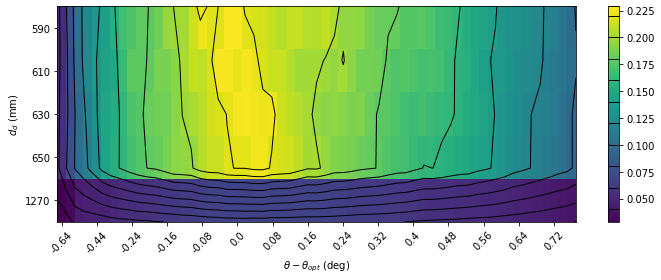

In [4]:
#%matplotlib qt
#plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
#from nicosload import read_nicos_file, read_pad_file
#%matplotlib inline
sth_opt = -1.16
dtx_vals =[k + 470 for k in [120,140,160,180]+[800]]
sth_vals = np.linspace(-0.4,-1.4,51).tolist() + np.linspace(-1.45,-1.8,8).tolist()
dtxlen = len(dtx_vals)
sthlen = len(sth_vals)
#plt.switch_backend('Qt5Agg')
all_amplitudes = np.loadtxt('fit_data/second_amps')
all_amplitudesErr = np.loadtxt('fit_data/second_amp_err')
all_sigmas = np.loadtxt('fit_data/second_centers')
all_centers = np.loadtxt('fit_data/second_sigmas')
################################### nice image colour plot ######################################
fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(1, 1, 1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
im = ax.imshow(all_amplitudes[:, ::-1]/10**6, extent=(0, len(sth_vals), 0, len(dtx_vals)), aspect = 'auto')

ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')
ax.tick_params(axis='x', rotation=45)
ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
fig.tight_layout()

############################ Contour plot #####################################################ä#
#fig = plt.figure(figsize = (10,4))
#ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

bl = ax.contour(all_amplitudes[::-1, ::-1]/10**6, extent=(0, len(sth_vals), 0, len(dtx_vals)), colors = 'black',aspect = 'auto',levels = 10,\
              linewidths = 1)
#cl= ax.contour(all_amplitudes[::-1,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto',levels = 10,linewidths = 1)
#cb = fig.colorbar(im)
ax.set_xlabel(r'$\theta - \theta_{opt}$ (deg)')
ax.set_ylabel('$d_d$ (mm)')

ax.tick_params(axis='x', rotation=45)

ax.axes.yaxis.set_ticks([k+0.5 for k in range(len(dtx_vals))])
ax.axes.yaxis.set_ticklabels([k for k in dtx_vals][::-1])

ax.axes.xaxis.set_ticks([k+0.5 for k in range(0,len(sth_vals),4)])
ax.axes.xaxis.set_ticklabels([round(k-sth_opt,2) for k in sth_vals][::-4])
#ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
#ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
cb = fig.colorbar(im)
cb.add_lines(bl)
#cb2 = fig.colorbar(bl,)
fig.tight_layout()
#fig.savefig("paper_images/firstnight.pdf",bbox_inches = 'tight')

#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightMap.pdf',bbox_inches = 'tight')


# Irregularly spaced data

[ 0.76  0.74  0.72  0.7   0.68  0.66  0.64  0.62  0.6   0.58  0.56  0.54
  0.52  0.5   0.48  0.46  0.44  0.42  0.4   0.38  0.36  0.34  0.32  0.3
  0.28  0.26  0.24  0.22  0.2   0.18  0.16  0.14  0.12  0.1   0.08  0.06
  0.04  0.02  0.   -0.02 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16 -0.18
 -0.2  -0.22 -0.24 -0.29 -0.34 -0.39 -0.44 -0.49 -0.54 -0.59 -0.64]
[590, 610, 630, 650]


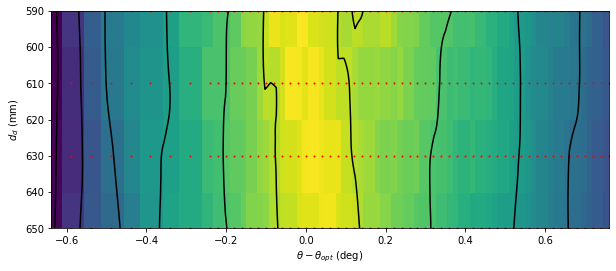

In [5]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed

all_amplitudes = np.loadtxt('fit_data/second_amps')
all_amplitudesErr = np.loadtxt('fit_data/second_amp_err')
all_sigmas = np.loadtxt('fit_data/second_centers')
all_centers = np.loadtxt('fit_data/second_sigmas')
# make up some randomly distributed data
sth_opt = -1.16
x = np.array(sth_vals)-sth_opt
print(x)
xi = np.linspace(x[0], x[-1], 100)
y = dtx_vals[:-1]
print(y)
yi = np.linspace(y[0], y[-1], 100)
xv, yv = np.meshgrid(x, y) 
xv = xv.flatten()
yv = yv.flatten()
z = all_amplitudes[:-1, :].flatten()
zi = griddata((xv, yv), z, (xi[None,:], yi[:,None]), method='nearest')
# contour the gridded data, plotting dots at the randomly spaced data points.

#CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig, ax = plt.subplots(1, figsize=(10,4))
ax.imshow(zi[:-1, :][::-1, :], extent=(x[0], x[-1], y[0], y[-1]), aspect='auto')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(y[0], y[-1])
zi = griddata((xv, yv), z, (xi[None,:], yi[:,None]), method='cubic')
ax.contour(zi[:, :], levels=6, colors='black', extent=(x[0], x[-1], y[0], y[-1]))
#plt.colorbar() # draw colorbar
# plot data points.
ax.scatter(xv,yv, marker='o', c='r', s=1)
ax.set_xlabel(r'$\theta - \theta_{opt}$ (deg)')
ax.set_ylabel(r'$d_d$ (mm)')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()

# Tricontour f test looking good

[ 0.76  0.74  0.72  0.7   0.68  0.66  0.64  0.62  0.6   0.58  0.56  0.54
  0.52  0.5   0.48  0.46  0.44  0.42  0.4   0.38  0.36  0.34  0.32  0.3
  0.28  0.26  0.24  0.22  0.2   0.18  0.16  0.14  0.12  0.1   0.08  0.06
  0.04  0.02  0.   -0.02 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16 -0.18
 -0.2  -0.22 -0.24 -0.29 -0.34 -0.39 -0.44 -0.49 -0.54 -0.59 -0.64]
[590, 610, 630, 650]


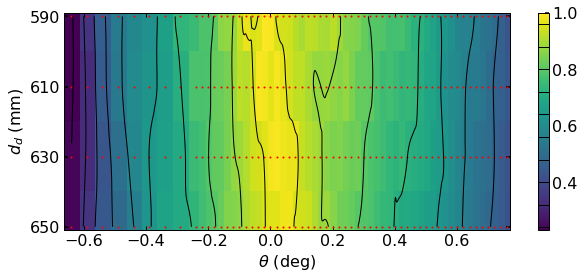

In [15]:
from scipy.interpolate import griddata
plt.style.use('/home/cherb/LRZSync/Doktorarbeit/Vorlagen_Verschiedenes/stylelibs/christoph.mplstyle')
sth_opt = -1.16
dtx_vals =[k + 470 for k in [120,140,160,180]+[800]]
sth_vals = np.linspace(-0.4,-1.4,51).tolist() + np.linspace(-1.45, -1.8, 8).tolist()

all_amplitudes = np.loadtxt('fit_data/second_amps')[:-1,:]
all_amplitudesErr = np.loadtxt('fit_data/second_amp_err')
all_sigmas = np.loadtxt('fit_data/second_centers')
all_centers = np.loadtxt('fit_data/second_sigmas')
x = np.array(sth_vals)-sth_opt
print(x)
xi = np.linspace(x[0]+0.01, x[-1]-0.025, 1000)
y = dtx_vals[:-1]
print(y)
yi = np.linspace(y[0]-10, y[-1]+10, 1000)
xv, yv = np.meshgrid(x, y) 
xv = xv.flatten()

yv = yv.flatten()
z = all_amplitudes.flatten()
z = z/np.max(z)
zi = griddata((xv, yv), z, (xi[None,:], yi[:,None]), method='nearest')
# contour the gridded data, plotting dots at the randomly spaced data points.

#CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig, ax = plt.subplots(1, figsize=(10,4))
im = ax.imshow(zi[:, :][::-1, :], extent=(x[0]+0.01, x[-1]-0.025, y[0]-10, y[-1]+10), aspect='auto')
ax.set_yticks([590, 610, 630, 650][::-1])
zi = griddata((xv, yv), z, (xi[None,:], yi[:,None]), method='cubic')
bl = ax.contour(zi[:, :], levels=9, colors='black', extent=(x[0]+0.01, x[-1]-0.025, y[0]-10, y[-1]+10))
#plt.colorbar() # draw colorbar
# plot data points.
cb = fig.colorbar(im)
cb.add_lines(bl)
ax.scatter(xv,yv, marker='o', c='red', s=1)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$d_d$ (mm)')
ax.invert_xaxis()
ax.set_ylim(y[0]-1, y[-1]+1)
ax.invert_yaxis()
fig.savefig('/home/cherb/LRZSync/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightParmap.pdf',bbox_inches = 'tight')
plt.show()

[ 0.76  0.74  0.72  0.7   0.68  0.66  0.64  0.62  0.6   0.58  0.56  0.54
  0.52  0.5   0.48  0.46  0.44  0.42  0.4   0.38  0.36  0.34  0.32  0.3
  0.28  0.26  0.24  0.22  0.2   0.18  0.16  0.14  0.12  0.1   0.08  0.06
  0.04  0.02  0.   -0.02 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16 -0.18
 -0.2  -0.22 -0.24 -0.29 -0.34 -0.39 -0.44 -0.49 -0.54 -0.59 -0.64]
(-0.75, 0.8299999999999998)
lasd 130.0 -1.12


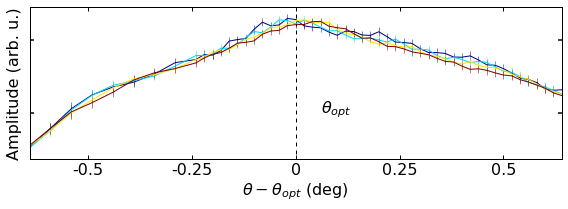

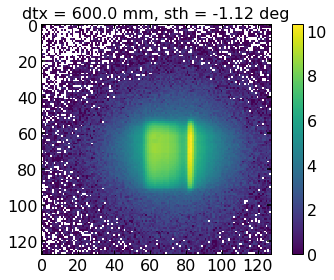

In [25]:
################################### multiplot #################################################

from nicosload import read_pad_file

theta_opt = -1.16
fig,ax = plt.subplots(1,1, figsize = (8,3))
vir = plt.get_cmap('jet')
n = 4
color = vir(np.linspace(0, 1, n))
#ax.set_prop_cycle(color =[colormap(i) for i in np.linspace(0, 1, len(all_amplitudes))][::-1])  
for line in range(n):
    
    ax.errorbar(np.array(sth_vals)-theta_opt, all_amplitudes[line,:]/10**6,\
                all_amplitudesErr[line,:]/10**6,label = '$d_d$ = {} mm'.format(dtx_vals[line]),\
                marker = '',linestyle = '-',linewidth = 1, elinewidth = 0.5, color=color[line])
print(np.array(sth_vals)-theta_opt)
ax.text(0.06, 0.1, r'$\theta_{opt}$', fontsize=16)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
#ax.legend(fontsize = 10, loc = (1.01,0), ncol=2)
#ax.legend(fontsize = 10, loc = (1.01,0), ncol=2)
ax.set_xlabel(r'$\theta-\theta_{opt}$ (deg)')
ax.set_ylabel('Amplitude (arb. u.)')
ax.set_yticklabels([])
theta_diff = [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]

ax.set_xticks(theta_diff)
ax.set_xticklabels(theta_diff)
xlims = ax.get_xlim()
print(xlims)

ax.set_xlim(-0.64, 0.64)
#print(xlabels)
maxLine = ax.axvline(0, -1,2, color = 'black')
maxLine.set_dashes([4,4])
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightParmap.pdf',bbox_inches = 'tight')
fig,ax = plt.subplots(1,1)
data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(5184))
ax.set_title('dtx = {} mm, sth = {} deg'.format(mes['dtx_value']+470, mes['sth_value']))
im = ax.imshow(np.log(data[::-1,:]))
cb = fig.colorbar(im)
ax.axes.xaxis.set_ticks([k for k in range(0,140,20)])
ax.axes.yaxis.set_ticks([k for k in range(0,140,20)])
fig.tight_layout()
print('lasd',mes['dtx_value'],mes['sth_value'])
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/focus.pdf')
#print(sth_vals[47],dtx_vals[4])

[(0.5, -0.4), (4.5, -0.48), (8.5, -0.56), (12.5, -0.64), (16.5, -0.72), (20.5, -0.8), (24.5, -0.88), (28.5, -0.96), (32.5, -1.04), (36.5, -1.12), (40.5, -1.2), (44.5, -1.28), (48.5, -1.36), (52.5, -1.5), (56.5, -1.7)]


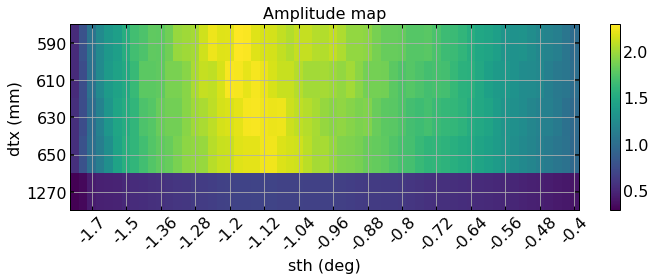

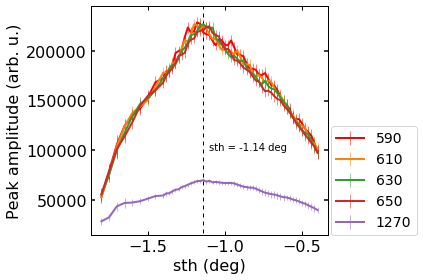

In [3]:
import matplotlib
matplotlib.use('qt4agg')
%matplotlib qt
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}



xplot = [(k+0.5,round(val,3)) for k,val in enumerate(sth_vals)]
#print(xplot)
im = ax.imshow((all_amplitudes[:,::-1]/100000),extent= (59,0,0,5),aspect = 'auto')
cb = fig.colorbar(im)
ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')

ax.tick_params(axis='x', rotation=45)

#the x axis of the plot has to be adjusted
xticks = [tick for tick in xplot[::4]]
print(xticks)
ax.axes.xaxis.set_ticks([k[0] for k in xticks])
ax.axes.xaxis.set_ticklabels([k[1] for k in xticks])

ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,5)])
ax.axes.yaxis.set_ticklabels([k for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
ax.set_title('Amplitude map')
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightMap.pdf',bbox_inches = 'tight')

fig,ax = plt.subplots(1,1)
for line in range(5):
    
    ax.errorbar(sth_vals,all_amplitudes[line,:],all_amplitudesErr[line,:],\
                label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2,elinewidth = 0.5)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(175000,235000)
ax.legend(fontsize = 14,loc = (1.01,0))
ax.set_xlabel('sth (deg)')
ax.set_ylabel('Peak amplitude (arb. u.)')
maxLine = ax.axvline(-1.14,-1,2,color = 'black')
ax.text(-1.10,100000,'sth = -1.14 deg')
maxLine.set_dashes([4,4])
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightParmap.pdf',bbox_inches = 'tight')

# Best Focus


[0, 50, 100, 150, 200] [0, 50, 100, 150, 200]
lasd 140.0 -1.139
0
32
64
96
128
[0, 50, 100, 150, 200]
Test peaks [83]
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
g0_area    1.988e+05        0      inf     6826     True     None     None
g0_center     83.17     -inf      inf  0.03023     True     None     None
g0_sigma     0.8717        0      inf  0.02413     True     None     None
o0_c            437     -100      inf    82.79     True     None     None
o0_m              0     -inf      inf        0    False     None     None
[   15    15    21    15    12    20    17    21    18    21    22    19
    15    25    23    33    25    31    34    19    25    30    23    18
    37    29    32    32    40    43    29    34    45    36    45    60
    49    68    84    82    75    88    77    92    83    99   106   105
   117   115   130   133   182   160   185   211   222   708  2141  2961
  2786  2605  3478  4866  4058  4082  4624  4433  3048  2096  1470   6

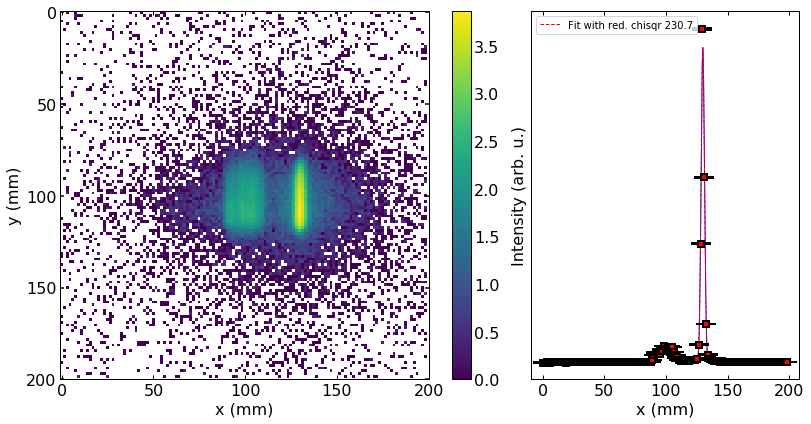

In [3]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
from matplotlib import gridspec
%matplotlib inline
fig = plt.figure(figsize=(13, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.2, 1])
ax1 = fig.add_subplot(gs[0])
ax0 = fig.add_subplot(gs[1])

data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(6735))
im = ax1.imshow(np.log10(data[::-1,:]),interpolation= 'none')
ax1.axes.xaxis.set_ticks([0,32,64,96,128])
ax1.axes.yaxis.set_ticks([0,32,64,96,128])
#print(ax.axes.xaxis.get_ticklabels())




fig.colorbar(im,ax = ax1,fraction=0.046, pad=0.04)
fig.tight_layout()
xticks = [int(float(k.get_text())*200/128) for k in ax1.get_xticklabels()]
yticks = [int(float(k.get_text())*200/128) for k in ax1.get_yticklabels()]
ax1.axes.xaxis.set_ticklabels(xticks)
ax1.axes.yaxis.set_ticklabels(xticks)

print(xticks,yticks)
print('lasd',mes['dtx_value'],mes['sth_value'])

dat1 = Datafile('asd')
integrated = np.sum((data[::-1,:]),axis = 0)
yerr = integrated**0.5
xs = list(range(0, 128, 128))
#ax0.plot(integrated, linestyle=' ')
#
ax0.axes.yaxis.set_ticks([])

xlabels = []

#xlabels = [int(float(k.get_text())*200/128) for k in ax0.get_xticklabels()]
#ax0.set_xticklabels(xlabels)
plt.tight_layout()
#res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
#                    plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
#
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightBestfocus.pdf',bbox_inches = 'tight')
#print(sth_vals[47],dtx_vals[4])
xlabels = []
ax0.set_xticks([0,32,64,96,128])
ax0.set_xticklabels([0,32,64,96,128])
for k in ax0.get_xticklabels():
    xlabels.append(int(k.get_text())*200//128)
    print(k.get_text())
print(xlabels)
ax0.set_xticklabels(xlabels)
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
#dat1.fig,dat1.ax = plt.subplots(1,1) 
# gaussian fit
dat1 = Datafile('asdf')
dat1.ax = ax0
res = dat1.fit_gauss(np.array([k for k in range(len(integrated))]), integrated, peaks = 1,\
                        plotout=1, errs=yerr, xlabel = 'x',vlines = False, xmin=120/200*128, xmax=150/200*128)
res.params.pretty_print()
ax0.errorbar(x=[k for k in range(len(integrated))], y=integrated, yerr=yerr, marker='s', linestyle=' ', color='red', \
    markeredgecolor='black', capsize=10)
print(integrated, yerr)
ax0.set_ylabel('Intensity (arb. u.)')
ax0.set_xlabel('x (mm)')
handles, labels = ax0.get_legend_handles_labels()
labels = ['Fit comprising\ntwo Gaussian peaks']
#ax0.legend(handles,labels)
res.params['g0_center'].value
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightBestfocus.pdf',bbox_inches = 'tight')

# kannst du mich hören?


0.16341505098649856
0.77772165359564


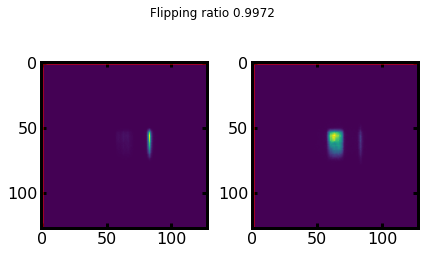

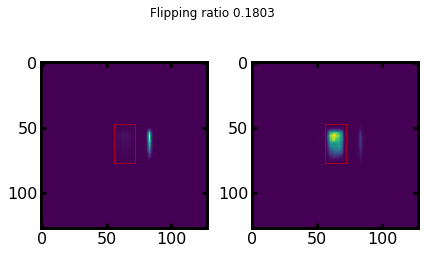

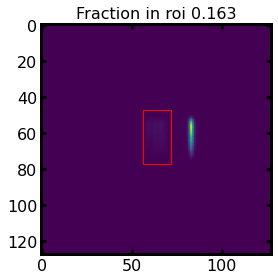

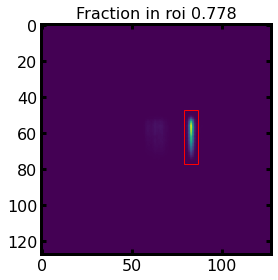

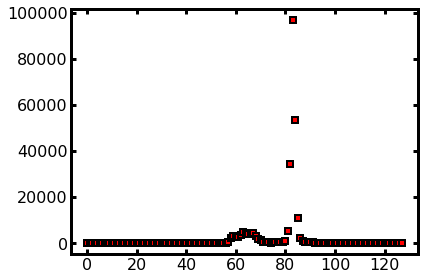

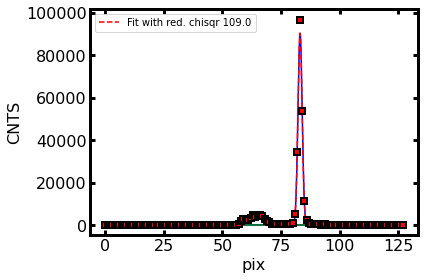

In [2]:
import importlib
import dataEval
from datafile import Datafile
importlib.reload(dataEval)
#importlib.reload(datafile.Datafile)


roi = (1,127,1,127)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)


roi = (56,72,47,77)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)

roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)

roi = (79,87,47,77)
roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(6735),roi)
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
res

# Comparison with smaller slitsize to check if crosstalk is mainly responsible for width

Test peaks [83 66]
ffo


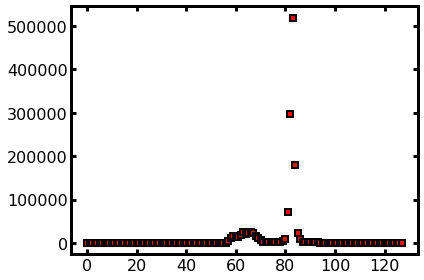

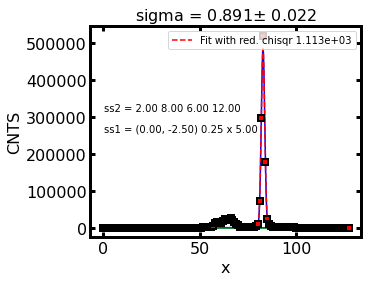

In [20]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7177),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7177))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
#dat1.ax.plot(range(500))
plt.show()
res

Test peaks [82 64]
ffo


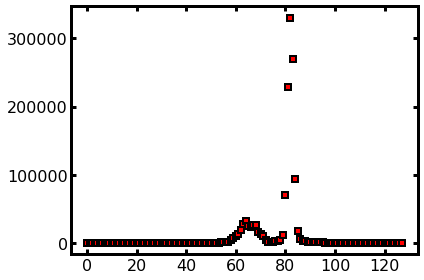

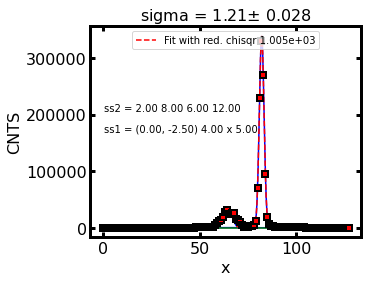

In [21]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7251),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7251))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
#dat1.ax.plot(range(500))
plt.show()
res

# This behaviour is reprocible in simulations, do we need it?


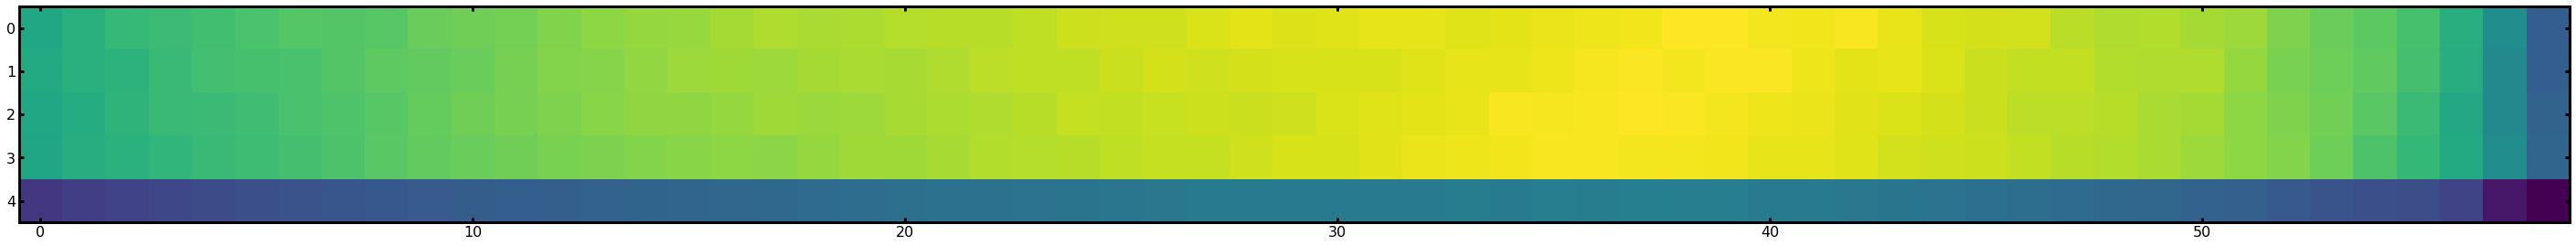

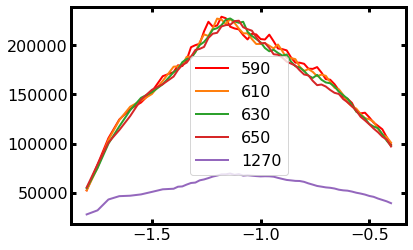

In [4]:
%matplotlib inline
plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_amplitudes[:,:]))


fig,ax = plt.subplots(1,1)
for line in range(len(dtx_vals)):
    
    ax.plot(sth_vals,all_amplitudes[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
#print(sth_vals[47],dtx_vals[4])

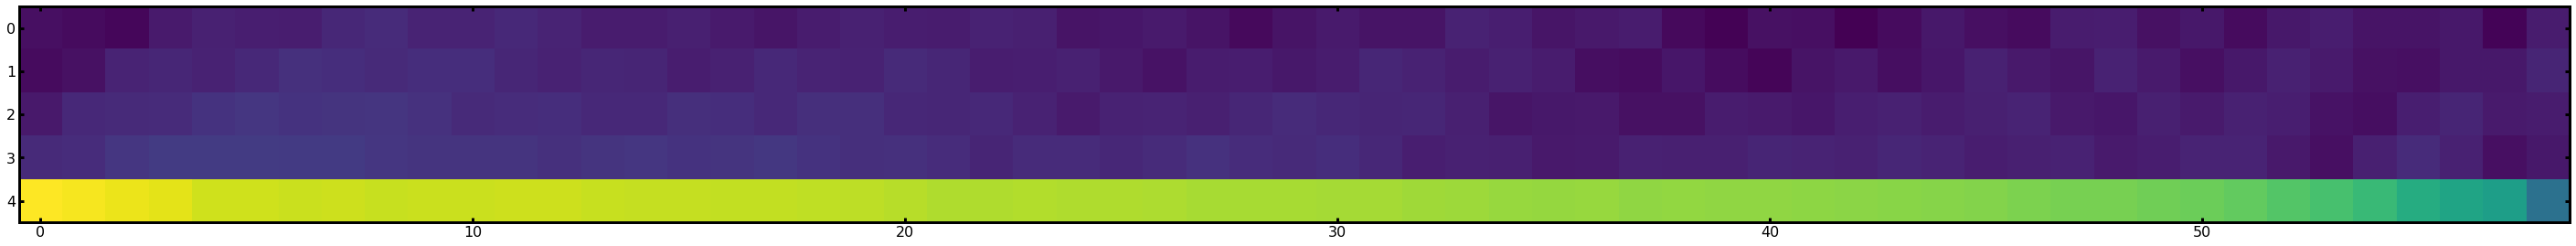

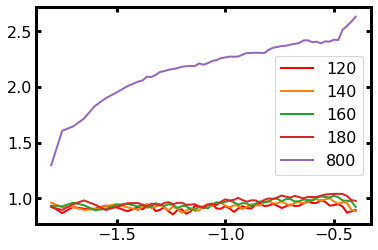

In [8]:
%matplotlib inline
plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_sigmas[:,:]))


fig,ax = plt.subplots(1,1)
for line in range(len(dtx_vals)):
    
    ax.plot(sth_vals,all_sigmas[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
#print(sth_vals[47],dtx_vals[4])

In [ ]:
from nicosload import 

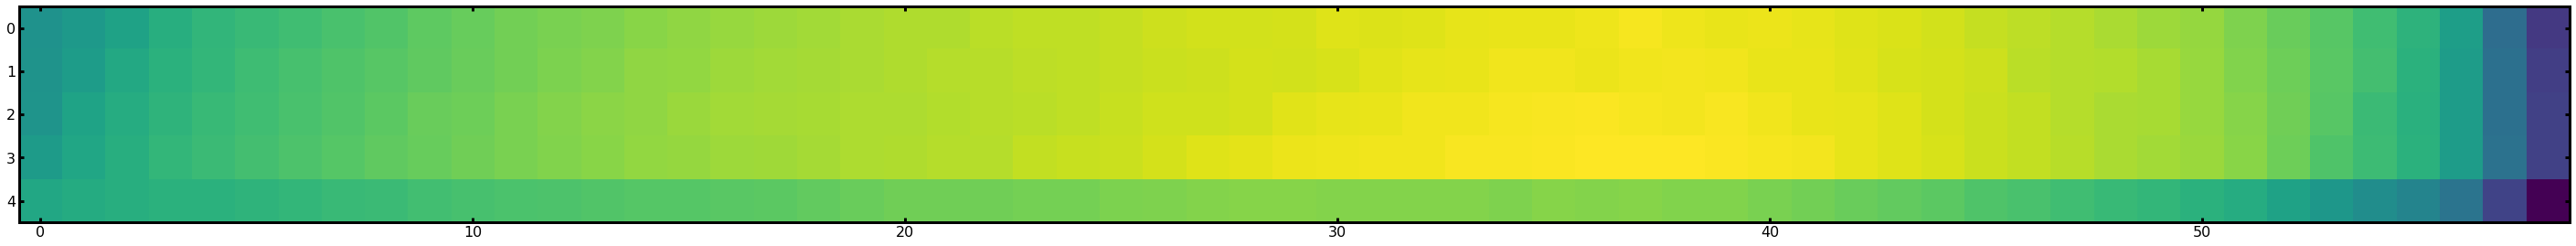

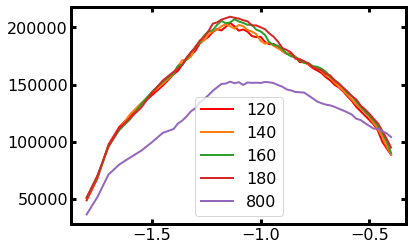

In [9]:
%matplotlib inline
plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_areas[:,:]))


fig,ax = plt.subplots(1,1)
for line in range(len(dtx_vals)):
    
    ax.plot(sth_vals,all_areas[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
#print(sth_vals[47],dtx_vals[4])

# How likely three hourglass or more

In [9]:
(1/6)**3*(5/6)**2+(1/6)**3*(5/6)**1+(1/6)**5+(1/6)**2*(5/6)**3*(1-(5/6)**3)+(1/6)**1*(5/6)**4*((1/6)**4+(1/6)**3*(5/6)+(1/6)**2*((5/6)**2)+(5/6)**5*((1/6)**3*(5/6)**2+(1/6)**3*(5/6)**1))

0.016125057115205465

In [62]:
from scipy.special import binom
p = 0.6
q = 0.4
total_dice = 5
min_dice = 3
throws = 2
def summe(p, q, start, end):
    #print([binom(end, i) for i in range(start, end + 1)])
    start = max([start, 0])
    return [p**i * q**(end-i)*binom(end, i) for i in range(start, end + 1)]




def total_prob(total_dice, p, min_dice):
    total_prob = 0
    for first_try in range(0, total_dice+1):
        total_prob += binom(total_dice, first_try)*p**first_try*(1-p)**(total_dice-first_try) * sum(summe(p, 1-p, min_dice-first_try, total_dice-first_try))
    return total_prob


print(total_prob(5, 1/6, 4))

0.0329304105488662


In [80]:
def f(N, k, p):
    return binom(N, k)*p**k*(1-p)**(N-k)

def return_probmat(N, p):
    mat = np.array([[0]*k + [f(N-k, i, p) for i in range(N-k+1)] for k in range(N+1)])
    return np.transpose(mat)
markov = return_probmat(5, 1/6)
turn1 = np.dot(markov, np.array([[1], [0], [0], [0], [0], [0]]))
turn2 = np.dot(markov, turn1)
turn3 = np.dot(markov, turn2)
sum_prob = [np.sum(turn2[5-k:,0]) for k in range(6)]
print(turn2)
print(sum_prob)
print([5**(3-k)*turn2[-1-k,0] for k in range(3)])
#print(np.sum(return_probmat(5, 1/6), axis = 1))

[[0.16150558]
 [0.35531228]
 [0.31267481]
 [0.13757692]
 [0.03026692]
 [0.00266349]]
[0.0026634890885112363, 0.032930410548866196, 0.1705073262777524, 0.48318213475249383, 0.8384944171101545, 1.0000000000000002]
[0.33293613606390454, 0.7566730365088741, 0.687884578644431]


In [65]:
25*0.03026692

0.7566729999999999

In [92]:
turn1 = np.dot(markov, np.array([[0], [1], [0], [0], [0], [0]]))
turn1

array([[0.        ],
       [0.48225309],
       [0.38580247],
       [0.11574074],
       [0.0154321 ],
       [0.0007716 ]])

In [91]:
(5/6)**3

0.5787037037037038